# **DIC Shear Crack Inspector**

In [1]:
#%matplotlib widget

In [2]:
from bmcs_shear.dic_crack import DICGrid, DICAlignedGrid, DICCOR, DICInspector, DICCrack

# B1_TV1

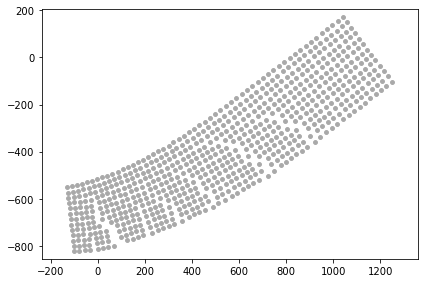

In [6]:
dic_grid = DICGrid(n_x=54, n_y=13, d_x = 23, d_y = 23, start_t = 0, end_t =10, U_factor = 100, dir_name='B10_TV2',
                  grid_column_first = False, grid_number_vertical = False)
dic_grid.interact()

In [3]:
dic_grid = DICGrid(n_x=59, n_y=15, d_x = 22, d_y = 22,  
                    start_t = 0, end_t =20, U_factor = 100, dir_name='B1_TV1', grid_column_first = False, 
                    grid_number_vertical = False)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-20, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 29, n_x_max = 37, n_x_step=1, n_y_min = 7, n_y_step = 1)

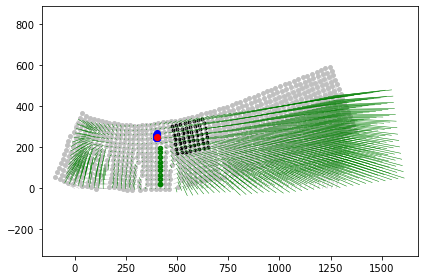

In [4]:
dic_cor.interact()

# B1_TV2

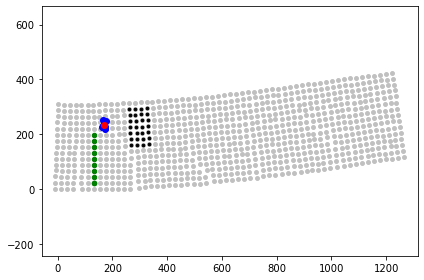

In [7]:
dic_grid = DICGrid(n_x=57, n_y=15, d_x = 22, d_y = 22, tart_t = 0, end_t =7, 
                     U_factor = 60, dir_name='B1_TV2', grid_column_first = False, grid_number_vertical = False)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i = -7, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -16, n_x_max = -12, n_x_step=1, n_y_min = 7, n_y_max=-1, n_y_step = 1)
dic_cor.interact()

# B6_TV1

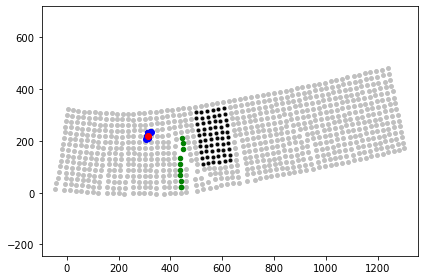

In [12]:
dic_grid = DICGrid(n_x=58, n_y=15, d_x = 22, d_y = 22, 
                     start_t = 0, end_t =8, U_factor = 100, dir_name='B6_TV1', grid_column_first = False, 
                    grid_number_vertical = False)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-21, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -29, n_x_max = -23, n_x_step=1, n_y_min = 4, n_y_max=-1, n_y_step = 1)
dic_cor.interact()

# B6_TV2

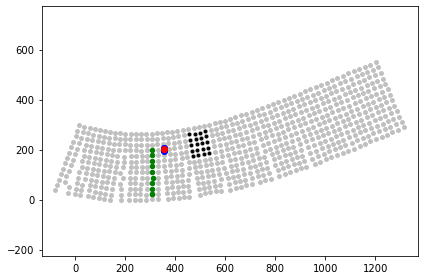

In [16]:
dic_grid = DICGrid(n_x=57, n_y=13, d_x = 22, d_y = 22, start_t = 0, end_t =-3, U_factor = 100, dir_name='B6_TV2_',
                  grid_column_first = False, grid_number_vertical = False)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i = -15, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -25, n_x_max = -21, n_x_step=1, n_y_min = 7, n_y_max=12, n_y_step = 1)
dic_cor.interact()

# B7_TV1

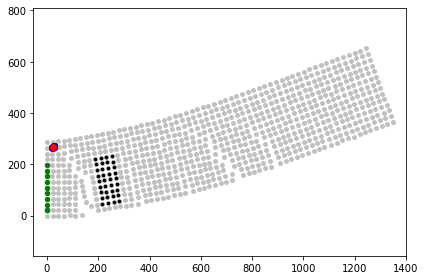

In [18]:
dic_grid = DICGrid(n_x=58, n_y=14, d_x = 22, d_y = 22, start_t = 0, end_t =17, U_factor = 100, dir_name='B7_TV1',
                   grid_column_first = False, grid_number_vertical = False)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-1, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -12, n_x_max = -8, n_x_step=1, n_y_min = 1, n_y_max=10, n_y_step = 1)
dic_cor.interact()

# B10_TV2

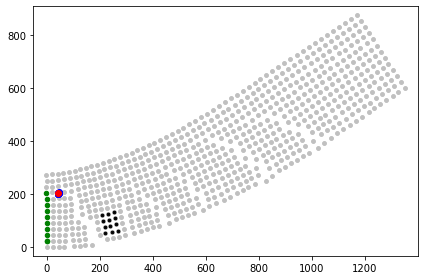

In [31]:
dic_grid = DICGrid(n_x=54, n_y=13, d_x = 23, d_y = 23, start_t = 0, end_t =10, U_factor = 100, dir_name='B10_TV2',
                  grid_column_first = False, grid_number_vertical = False)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-1, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -11, n_x_max = -8, n_x_step=1, n_y_min = 1, n_y_max=5, n_y_step = 1)
dic_cor.interact()

# Beams having grid numbering from top to bottom

# B5_TV1

In [8]:
dic_grid = DICGrid(n_x=68, n_y=11, d_x = 25, d_y = 25,  
                   start_t = 0, end_t =23, U_factor = 100, dir_name='B5_TV1', grid_column_first = True, 
                   grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-23, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min=-30, n_x_max=-27, n_x_step=1, n_y_min = 1, n_y_max=8, n_y_step = 1)

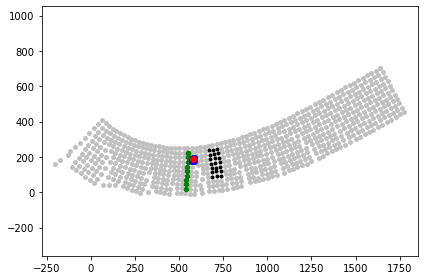

In [9]:
dic_cor.interact()

# B5_TV2

In [10]:
dic_grid = DICGrid(n_x=71, n_y=12, d_x = 25, d_y = 25,  
                   start_t = 0, end_t =20, U_factor = 100, dir_name='B5_TV2', grid_column_first = True, 
                   grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-26, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min=-31, n_x_max=-28, n_x_step=1, n_y_min = 3, n_y_max=10, n_y_step = 1)

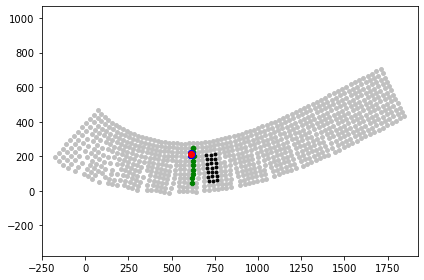

In [11]:
dic_cor.interact()

# B7_TV2

In [19]:
dic_grid = DICGrid(n_x=53, n_y=12, d_x = 23, d_y = 23,  
                   start_t = 0, end_t =15, U_factor = 100, dir_name='B7_TV2', grid_column_first = True, 
                   grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-28, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 1, n_x_max = 12, n_x_step=1, n_y_min = 1, n_y_max=-1, n_y_step = 1)

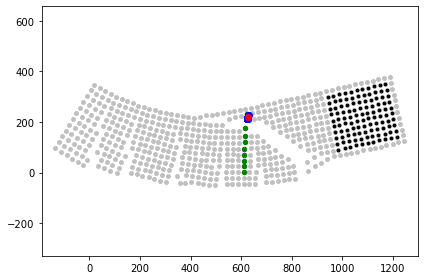

In [20]:
dic_cor.interact()

# B8_TV1

In [21]:
dic_grid = DICGrid(n_x=56, n_y=13, d_x = 23, d_y = 23,  
                   start_t = 0, end_t =14, U_factor = 100, dir_name='B8_TV1', grid_column_first = True, 
                   grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-33, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min=1, n_x_max=15, n_x_step=1, n_y_min = 2, n_y_max=12, n_y_step = 1)

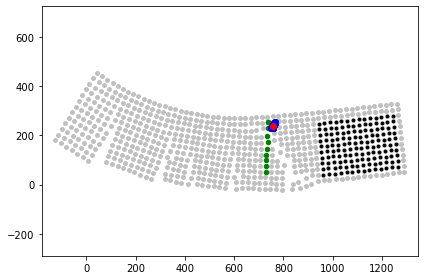

In [22]:
dic_cor.interact()

# B8_TV2

In [23]:
dic_grid = DICGrid(n_x=56, n_y=14, d_x = 23, d_y = 23,  
                   start_t = 0, end_t =14, U_factor = 100, dir_name='B8_TV2', grid_column_first = True, 
                   grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-8, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -16, n_x_max = -13, n_x_step=1, n_y_min = 5, n_y_max=11, n_y_step = 1)

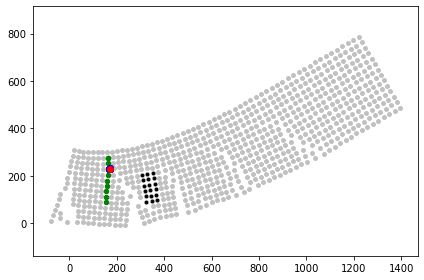

In [24]:
dic_cor.interact()

# B9_TV1

In [25]:
dic_grid = DICGrid(n_x=54, n_y=12, d_x = 23, d_y = 23, start_t = 0, end_t =19, U_factor = 100, dir_name='B9_TV1_',
                  grid_column_first = True, grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-30, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min=1, n_x_max=14, n_x_step=1, n_y_min = 1, n_y_max=10, n_y_step = 1)

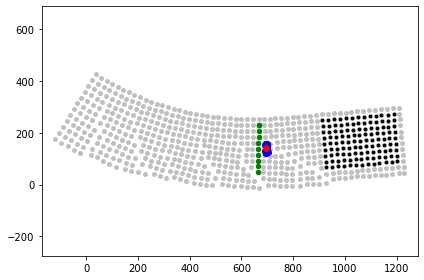

In [26]:
dic_cor.interact()

# B9_TV2

In [27]:
dic_grid = DICGrid(n_x=57, n_y=13, d_x = 22, d_y = 22,  
                   start_t = 0, end_t =16, U_factor = 100, dir_name='B9_TV2', grid_column_first = True, 
                   grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-33, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min=1, n_x_max=14, n_x_step=1, n_y_min = 1, n_y_max=10, n_y_step = 1)

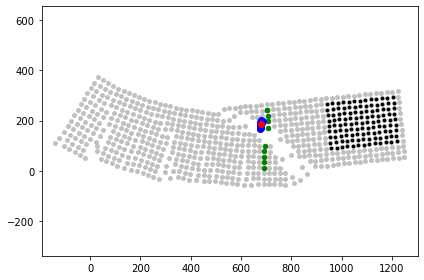

In [28]:
dic_cor.interact()

# B10_TV1

In [29]:
dic_grid = DICGrid(n_x=57, n_y=14, d_x = 22, d_y = 22,  
                   start_t = 0, end_t =15, U_factor = 100, dir_name='B10_TV1', grid_column_first = True, 
                   grid_number_vertical = True)
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-14, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -25, n_x_max = -22, n_x_step=1, n_y_min = 5, n_y_max=10, n_y_step = 1)

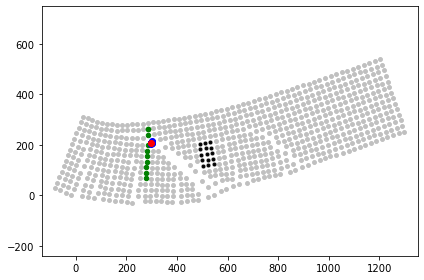

In [30]:
dic_cor.interact()

In [6]:
import numpy as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[:1]

array([0, 1])